# Лаботраторная работа 2.1
### Решение нелинейных уравнений

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

### Метод Ньютона

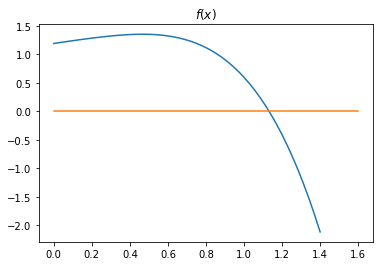

In [2]:
def f(x):
    return np.log(x+2)-x**4+0.5

x = np.linspace(0, 1.4, 50)
plt.plot(x, f(x))
plt.plot([0, 1.6], [0, 0])
plt.title(r'$f(x)$')
plt.show()

$x^{(0)}=1.3$ \
$f(x^{(0)}) < 0$ и $f^{''}(x^{(0)}) < 0$ \
$f(x^{(0)})f^{''}(x^{(0)}) > 0$

In [3]:
def Newton_method(f, df, x0, e):
    counter = 0
    x = x0
    print('Итерация '+str(counter)+': x = '+str(x))
    counter += 1
    x_next = x-(f(x)/df(x))
    print('Итерация '+str(counter)+': x = '+str(x_next))
    counter += 1
    while abs(x_next - x) >= e:
        x = x_next
        x_next = x-(f(x)/df(x))
        print('Итерация '+str(counter)+': x = '+str(x_next))
        counter += 1
    return x_next

In [4]:
def df(x):
    return 1/(x+2)-4*x**3

x0 = 1.3
e = 0.001

answer = Newton_method(f, df, x0, e)
print('Корень уравнения с точностью '+str(e)+': x = '+str(answer))

Итерация 0: x = 1.3
Итерация 1: x = 1.1630310333409177
Итерация 2: x = 1.133229753109308
Итерация 3: x = 1.1319338486866162
Итерация 4: x = 1.1319314744236986
Корень уравнения с точностью 0.001: x = 1.1319314744236986


### Метод простых итераций

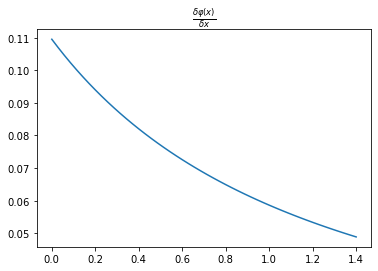

In [5]:
def phi(x):
    return np.power(np.log(x+2)+0.5, 1/4)
def dphi(x):
    return 1/((4*x+8)*np.power(np.log(x+2)+0.5, 3/4))

x = np.linspace(0, 1.4, 50)
plt.plot(x, dphi(x))
plt.title(r'$\frac{\delta \varphi(x)}{\delta x}$')
plt.show()

$\exist q:|\phi'(x)|\leq q < 1 \quad \forall x \in (a, b)$ \
$a = 1, b = 1.4$ \
$q = |\phi'(1)|$ \
$q = \frac{1}{(4+8)(ln(1+2)+0.5)^{3/4}} = 0.0586154$

In [6]:
def Simple_iteration_method(phi, x0, q, e):
    counter = 0
    x = x0
    print('Итерация '+str(counter)+': x = '+str(x))
    counter += 1
    x_next = phi(x)
    print('Итерация '+str(counter)+': x = '+str(x_next))
    counter += 1
    while q/(1-q)*abs(x_next-x) > e:
        x = x_next
        x_next = phi(x)
        print('Итерация '+str(counter)+': x = '+str(x_next))
        counter += 1
    return x_next

In [7]:
x0 = 1.0
q = 0.0586154
e = 0.001

answer = Simple_iteration_method(phi, x0, q, e)
print('Корень уравнения с точностью '+str(e)+': x = '+str(answer))

Итерация 0: x = 1.0
Итерация 1: x = 1.1244387062030958
Итерация 2: x = 1.1315183627844028
Корень уравнения с точностью 0.001: x = 1.1315183627844028


# Лаботраторная работа 2.2
### Решение систем нелинейных уравнений

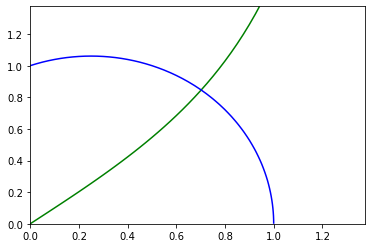

In [8]:
def f1(x):
    return 2*x[0]**2-x[0]+x[1]**2-1
def f2(x):
    return x[1]-np.tan(x[0])

def df1x1(x):
    return 2*2*x[0]-1
def df1x2(x):
    return 2*x[1]
def df2x1(x):
    return -1/(np.cos(x[0])**2)
def df2x2(x):
    return 1

def f(x):
    return np.array([f1(x), f2(x)])

def J(x):
    return np.array([[df1x1(x), df1x2(x)],
                     [df2x1(x), df2x2(x)]])

delta = 0.025
xrange = np.arange(0, 1.4, delta)
yrange = np.arange(0, 1.4, delta)
X, Y = np.meshgrid(xrange,yrange)

G = Y-np.tan(X)
F = 2*X**2-X+Y**2-1
plt.contour(X, Y, G, 0, colors='green')
plt.contour(X, Y, F, [0], colors='blue')
plt.show()

### Метод Ньютона

In [9]:
def Newton_method(f, J, x0, e):
    counter = 0
    x = x0
    print('Итерация '+str(counter)+': x = '+str(x))
    counter += 1
    delta_x = np.linalg.solve(J(x), -f(x))
    x_next = x+delta_x
    print('Итерация '+str(counter)+': x = '+str(x_next))
    counter += 1
    while np.linalg.norm(x_next-x) > e:
        x = x_next
        delta_x = np.linalg.solve(J(x), -f(x))
        x_next = x+delta_x
        print('Итерация '+str(counter)+': x = '+str(x_next))
        counter += 1
    return x_next

In [10]:
x0 = np.array([0.7, 0.8])
e = 0.001

answer = Newton_method(f, J, x0, e)
print('Корень уравнения с точностью '+str(e)+': x = '+str(answer))

Итерация 0: x = [0.7 0.8]
Итерация 1: x = [0.70272068 0.84693924]
Итерация 2: x = [0.70224688 0.84613628]
Корень уравнения с точностью 0.001: x = [0.70224688 0.84613628]


### Метод простых итераций

Вычисление $\varphi$ и $q$

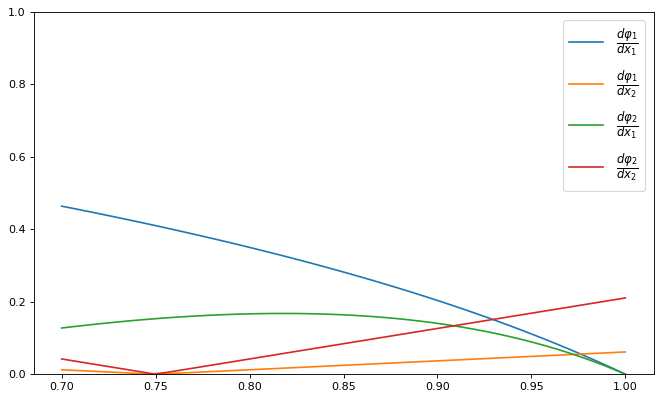

In [11]:
def f1(x):
    return 2*x[0]**2-x[0]+x[1]**2-1
def f2(x):
    return x[1]-np.tan(x[0])
x0 = np.array([1, 0.75])

def df1x1(x):
    return 2*2*x[0]-1
def df1x2(x):
    return 2*x[1]
def df2x1(x):
    return -1/(np.cos(x[0])**2)
def df2x2(x):
    return 1

def f(x):
    return np.array([f1(x), f2(x)])

def J(x):
    return np.array([[df1x1(x), df1x2(x)],
                     [df2x1(x), df2x2(x)]])
J_inv = np.linalg.inv(J(x0))

def phi_1(X):
    return X[0]-J_inv[0,0]*(2*X[0]**2-X[0]+X[1]**2-1)-J_inv[0,1]*(X[1]-np.tan(X[0]))
def phi_2(X):
    return X[1]-J_inv[1,0]*(2*X[0]**2-X[0]+X[1]**2-1)-J_inv[1,1]*(X[1]-np.tan(X[0]))

def phi(X):
    return np.array([phi_1(X), phi_2(X)])

def abs_dphi_1x_1(x_1):
    return abs(1-J_inv[0, 0]*(4*x_1-1)-J_inv[0, 1]*(-1/(np.cos(x_1)**2)))
def abs_dphi_1x_2(x_2):
    return abs(-J_inv[0, 0]*(2*x_2)-J_inv[0, 1])
def abs_dphi_2x_1(x_1):
    return abs(-J_inv[1, 0]*(4*x_1-1)-J_inv[1, 1]*(-1/(np.cos(x_1)**2)))
def abs_dphi_2x_2(x_2):
    return abs(1-J_inv[1, 0]*(2*x_2)-J_inv[1, 1])

def Jphi(X):
    return np.array([[abs_dphi_1x_1(X[0]), abs_dphi_1x_2(X[1])],
                     [abs_dphi_2x_1(X[0]), abs_dphi_2x_2(X[1])]])
def normJphi(X):
    return max(Jphi(X)[0, 0]+Jphi(X)[0, 1], Jphi(X)[1, 0]+Jphi(X)[1, 1])

x = np.linspace(0.7, 1, 50)
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, abs_dphi_1x_1(x), label=r'$\frac{d \varphi_1}{d x_1}$')
plt.plot(x, abs_dphi_1x_2(x), label=r'$\frac{d \varphi_1}{d x_2}$')
plt.plot(x, abs_dphi_2x_1(x), label=r'$\frac{d \varphi_2}{d x_1}$')
plt.plot(x, abs_dphi_2x_2(x), label=r'$\frac{d \varphi_2}{d x_2}$')
plt.legend(loc=0, prop={'size': 15})
plt.ylim([0, 1])
plt.show()

In [18]:
x = np.linspace(0.7, 1, 100)
y = np.linspace(0.7, 1, 100)

q = 0
for x_i in x:
    for y_j in y:
        q = max(normJphi([x_i, y_j]), q)
q

0.5251852463129187

In [19]:
def Simple_iteration_method(phi, x0, q, e):
    counter = 0
    x = x0
    print('Итерация '+str(counter)+': x = '+str(x))
    counter += 1
    x_next = phi(x)
    print('Итерация '+str(counter)+': x = '+str(x_next))
    counter += 1
    while q/(1-q)*np.linalg.norm(x_next-x) > e:
        x = x_next
        x_next = phi(x)
        print('Итерация '+str(counter)+': x = '+str(x_next))
        counter += 1
    return x_next

In [20]:
x0 = np.array([1, 0.75])
e = 0.001

answer = Simple_iteration_method(phi, x0, q, e)
print('Корень уравнения с точностью '+str(e)+': x = '+str(answer))

Итерация 0: x = [1.   0.75]
Итерация 1: x = [0.7820655 0.810869 ]
Итерация 2: x = [0.73630304 0.83659663]
Итерация 3: x = [0.71756691 0.84215209]
Итерация 4: x = [0.70928652 0.84440769]
Итерация 5: x = [0.70551001 0.84535233]
Итерация 6: x = [0.70376541 0.84577533]
Итерация 7: x = [0.70295473 0.84596868]
Корень уравнения с точностью 0.001: x = [0.70295473 0.84596868]
